# Week 3: Univariate & Bivariate Visual Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
file_path = "D:\screensense_cleaned_textbased.csv"

In [3]:
# ---- Load dataset ----
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}\nPut the file in the notebook folder or update file_path.")
df = pd.read_csv(file_path)
print("Loaded:", file_path, " — shape:", df.shape)
print("\nPreview:")
display(df.head())

Loaded: D:\screensense_cleaned_textbased.csv  — shape: (9712, 20)

Preview:


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,ScreenTime_Level,Edu_Recreational_%,Health_Impact_Count,Urban_Rural_Flag,Overuse_Index,Risk_Category,Primary_Use_Category,Device_Usage_Context,Weekday_Weekend_Usage,Usage_Behavior_Type,Health_Risk_Text
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teen (14-16),Moderate (3-6 hr),42,2,1,2.31,Low Risk,Entertainment (YouTube/OTT),Urban Smartphone,Lower Usage on Weekdays,Recreational Focused,Healthy Usage
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen (11-13),Moderate (3-6 hr),30,1,1,3.23,Medium Risk,Mixed Use,Urban Laptop,Higher Usage on Weekends,Recreational Focused,Moderate Risk
2,18,Female,3.73,Tv,True,0.32,Poor Sleep,Urban,Young Adult (17-18),Moderate (3-6 hr),32,1,1,2.54,Low Risk,Mixed Use,Urban Tv,Lower Usage on Weekdays,Recreational Focused,Healthy Usage
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,Teen (14-16),Low (<3 hr),39,0,1,0.74,Low Risk,Mixed Use,Urban Laptop,Lower Usage on Weekdays,Recreational Focused,Healthy Usage
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen (11-13),Moderate (3-6 hr),49,2,1,3.00,Low Risk,Mixed Use,Urban Smartphone,Higher Usage on Weekends,Recreational Focused,Healthy Usage


In [4]:
# save and show each plot 
def save_and_show(fig, filename):
    fig.savefig(filename, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filename}")


# UNIVARIATE PLOTS (one-per-plot)

([0, 1, 2, 3],
 [Text(0, 0, 'Child (8-10)'),
  Text(1, 0, 'Pre-Teen (11-13)'),
  Text(2, 0, 'Teen (14-16)'),
  Text(3, 0, 'Young Adult (17-18)')])

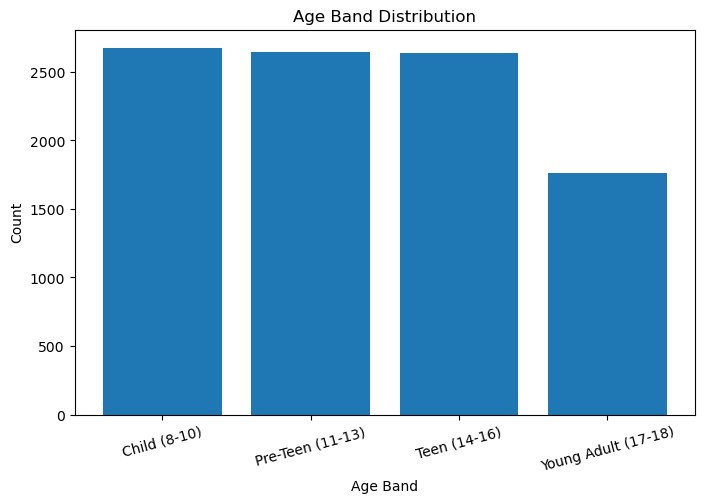

In [5]:
# 1) Age Band Distribution (count)
fig = plt.figure(figsize=(8,5))
age_counts = df['Age_Band'].value_counts().sort_index()
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.title("Age Band Distribution")
plt.xlabel("Age Band")
plt.ylabel("Count")
plt.xticks(rotation=15)

([0, 1, 2, 3],
 [Text(0, 0, 'Smartphone'),
  Text(1, 0, 'Tv'),
  Text(2, 0, 'Laptop'),
  Text(3, 0, 'Tablet')])

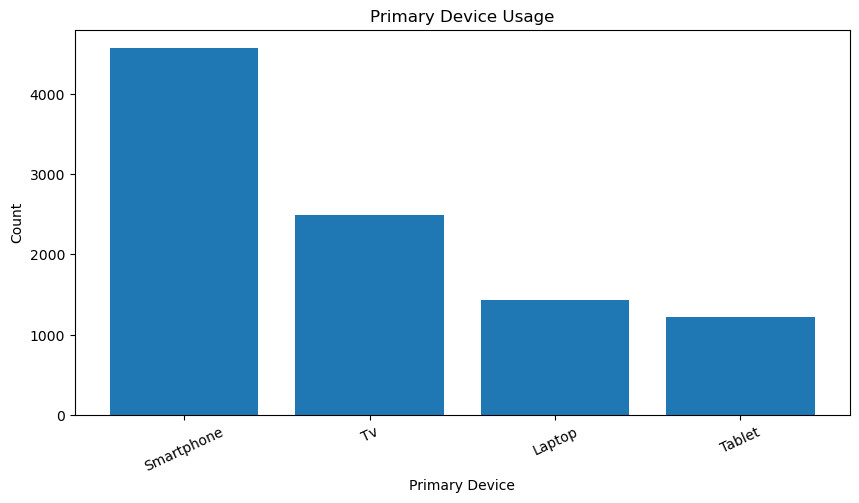

In [6]:
# 3) Primary Device Usage 
fig = plt.figure(figsize=(10,5))
device_counts = df['Primary_Device'].value_counts()
plt.bar(device_counts.index.astype(str), device_counts.values)
plt.title("Primary Device Usage")
plt.xlabel("Primary Device")
plt.ylabel("Count")
plt.xticks(rotation=25)

C:\Users\geeky\AppData\Local\Temp\ipykernel_12076\2972899176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=device_health, x='Primary_Device', y='Health_Impact_Count', palette='Set2')


([0, 1, 2, 3],
 [Text(0, 0, 'Laptop'),
  Text(1, 0, 'Smartphone'),
  Text(2, 0, 'Tablet'),
  Text(3, 0, 'Tv')])

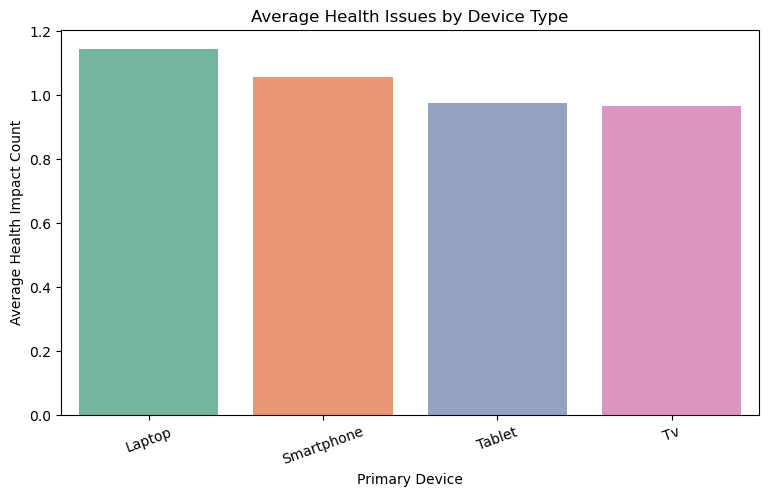

In [7]:
# 4) Average Health Issues by Device
fig = plt.figure(figsize=(9,5))
device_health = df.groupby('Primary_Device')['Health_Impact_Count'].mean().reset_index()
sns.barplot(data=device_health, x='Primary_Device', y='Health_Impact_Count', palette='Set2')
plt.title("Average Health Issues by Device Type")
plt.xlabel("Primary Device")
plt.ylabel("Average Health Impact Count")
plt.xticks(rotation=20)

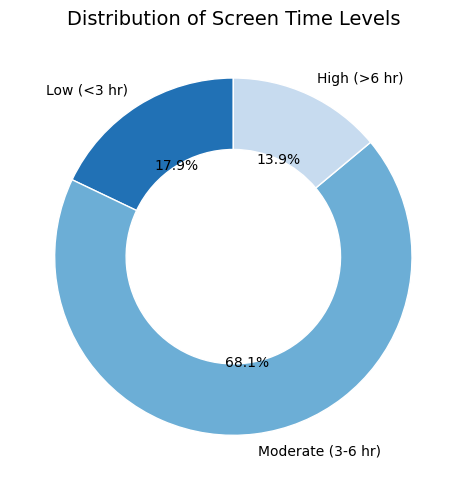

In [8]:
## Ensure consistent order
st_order = ['Low (<3 hr)', 'Moderate (3-6 hr)', 'High (>6 hr)']

# Normalize any hidden characters
df['ScreenTime_Level'] = df['ScreenTime_Level'].str.replace("–", "-").str.replace(" ", " ").str.strip()

# Count and reindex
screen_time_counts = df['ScreenTime_Level'].value_counts().reindex(st_order).fillna(0)

# Donut Chart
fig, ax = plt.subplots(figsize=(7, 5))
colors = sns.color_palette("Blues_r", len(screen_time_counts))

wedges, texts, autotexts = ax.pie(
    screen_time_counts.values,
    labels=screen_time_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'}  # makes it donut
)

plt.title("Distribution of Screen Time Levels", fontsize=14)
plt.tight_layout()
plt.show()


# BIVARIATE PLOTS (relationship between two variable)

([0, 1, 2, 3],
 [Text(0, 0, 'Child (8-10)'),
  Text(1, 0, 'Pre-Teen (11-13)'),
  Text(2, 0, 'Teen (14-16)'),
  Text(3, 0, 'Young Adult (17-18)')])

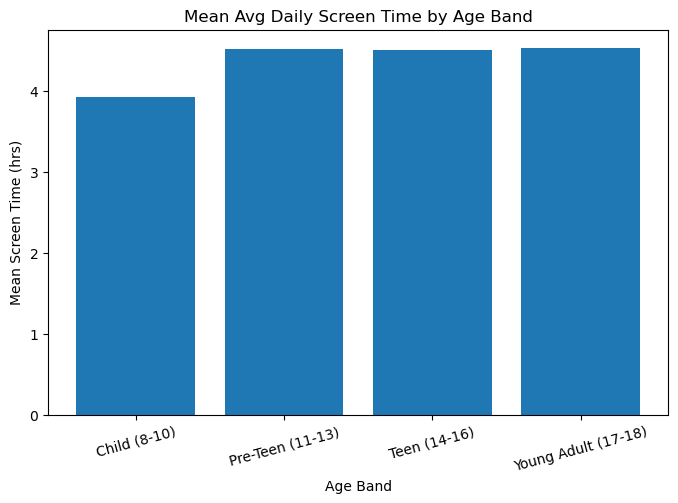

In [9]:
# 6) Mean Avg Daily Screen Time by Age Band 
fig = plt.figure(figsize=(8,5))
means_by_age = df.groupby('Age_Band')['Avg_Daily_Screen_Time_hr'].mean().reindex(age_counts.index)
plt.bar(means_by_age.index.astype(str), means_by_age.values)
plt.title("Mean Avg Daily Screen Time by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Mean Screen Time (hrs)")
plt.xticks(rotation=15)

C:\Users\geeky\AppData\Local\Temp\ipykernel_12076\144437033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='Set2')


Text(0, 0.5, 'Avg Daily Screen Time (hrs)')

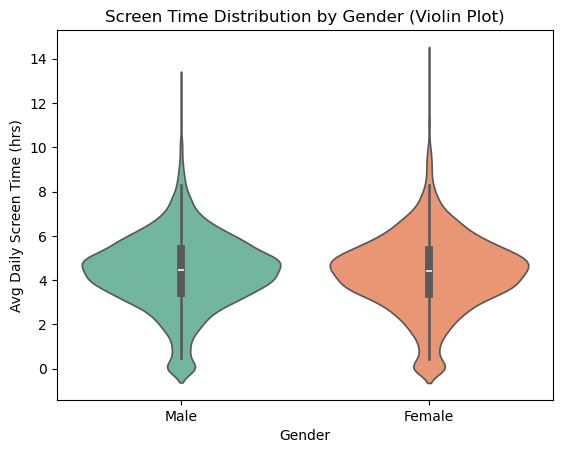

In [10]:
# 7) violinplot : Screen Time by Gender
fig = plt.figure()
sns.violinplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', palette='Set2')
plt.title("Screen Time Distribution by Gender (Violin Plot)")
plt.xlabel("Gender")
plt.ylabel("Avg Daily Screen Time (hrs)")

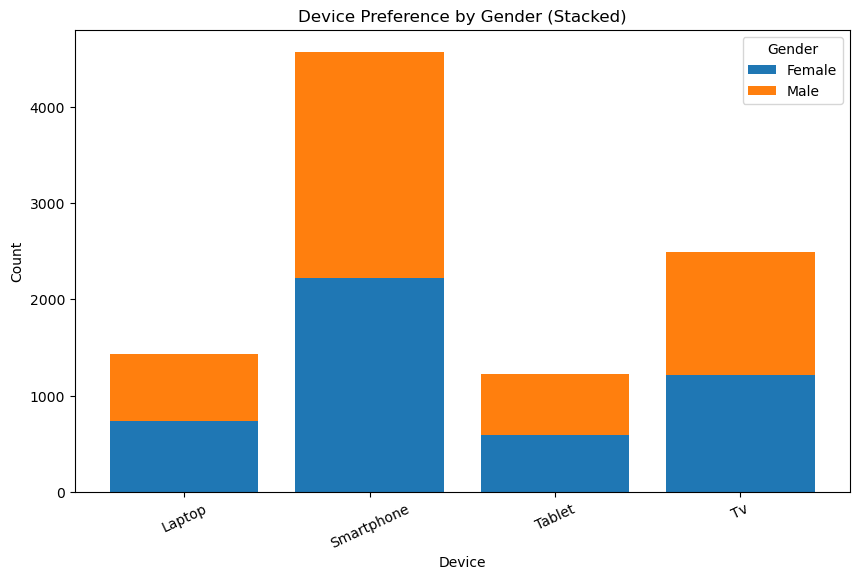

In [11]:
# 8) Device Preference by Gender 
contingency = pd.crosstab(df['Primary_Device'], df['Gender'])
fig = plt.figure(figsize=(10,6))
bottom = np.zeros(len(contingency))
x = np.arange(len(contingency))
for i, col in enumerate(contingency.columns):
    plt.bar(x, contingency[col].values, bottom=bottom, label=str(col))
    bottom = bottom + contingency[col].values
plt.xticks(x, contingency.index.astype(str), rotation=25)
plt.title("Device Preference by Gender (Stacked)")
plt.xlabel("Device")
plt.ylabel("Count")
plt.legend(title="Gender")

Text(0, 0.5, 'Avg Educational Ratio')

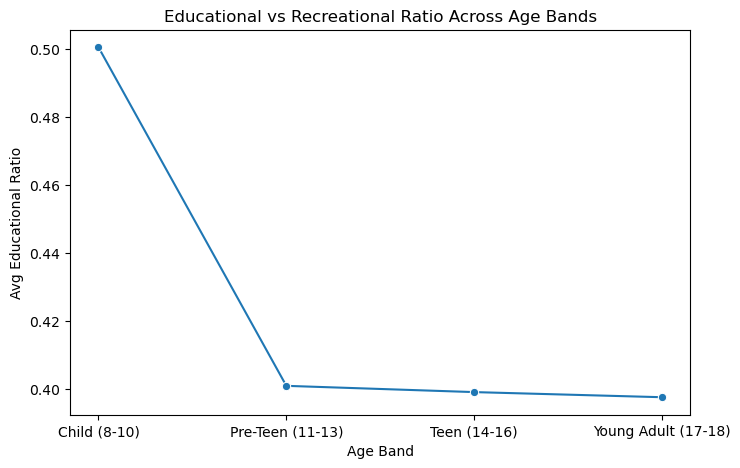

In [12]:
# 9) Educational Ratio Trend by Age Band
edu_ratio = df.groupby('Age_Band')['Educational_to_Recreational_Ratio'].mean().reset_index()
fig = plt.figure(figsize=(8,5))
sns.lineplot(data=edu_ratio, x='Age_Band', y='Educational_to_Recreational_Ratio', marker='o')
plt.title("Educational vs Recreational Ratio Across Age Bands")
plt.xlabel("Age Band")
plt.ylabel("Avg Educational Ratio")

# WEEK 4: Trend Analysis — Weekday vs Weekend Visual Exploration

In [13]:
# Create a Simulated "Day_Type" Column (Weekday/Weekend)
np.random.seed(42)
df['Day_Type'] = np.random.choice(['Weekday', 'Weekend'], size=len(df), p=[0.7, 0.3])

In [14]:
#  Apply Realistic Behavioral Adjustments for Weekends

# Increase average screen time on weekends by 15%
df.loc[df['Day_Type'] == 'Weekend', 'Avg_Daily_Screen_Time_hr'] *= 1.15

# Slightly increase health impacts (+10%) — longer exposure = more strain
df.loc[df['Day_Type'] == 'Weekend', 'Health_Impact_Count'] *= 1.10

# Decrease educational ratio by 10% — less study content, more fun content
df.loc[df['Day_Type'] == 'Weekend', 'Educational_to_Recreational_Ratio'] *= 0.90

# Round to reasonable precision
df['Avg_Daily_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'].round(2)
df['Health_Impact_Count'] = df['Health_Impact_Count'].round(1)
df['Educational_to_Recreational_Ratio'] = df['Educational_to_Recreational_Ratio'].round(2)

print("\n Adjusted dataset with realistic weekend behavior.\n")
print(df[['Day_Type','Avg_Daily_Screen_Time_hr','Health_Impact_Count','Educational_to_Recreational_Ratio']].head(10))


 Adjusted dataset with realistic weekend behavior.

  Day_Type  Avg_Daily_Screen_Time_hr  Health_Impact_Count  \
0  Weekday                      3.99                  2.0   
1  Weekend                      5.30                  1.1   
2  Weekend                      4.29                  1.1   
3  Weekday                      1.21                  0.0   
4  Weekday                      5.89                  2.0   
5  Weekday                      4.88                  1.0   
6  Weekday                      2.97                  0.0   
7  Weekend                      3.15                  0.0   
8  Weekday                      4.61                  2.0   
9  Weekend                      3.73                  2.2   

   Educational_to_Recreational_Ratio  
0                               0.42  
1                               0.27  
2                               0.29  
3                               0.39  
4                               0.49  
5                               0.44  
6 

C:\Users\geeky\AppData\Local\Temp\ipykernel_12076\3444069922.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.1 1.1 0.  ... 2.2 1.1 1.1]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Day_Type'] == 'Weekend', 'Health_Impact_Count'] *= 1.10


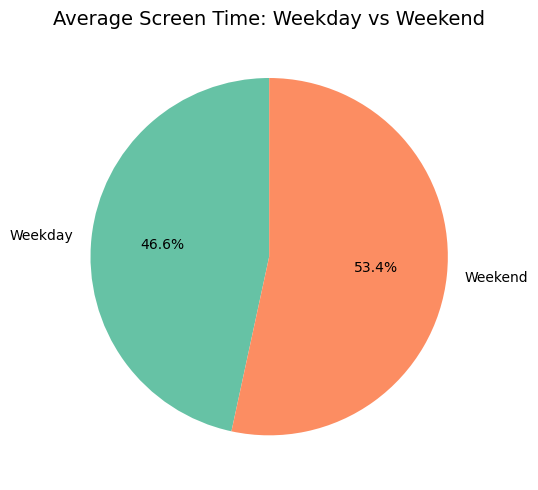

In [15]:
# Average Screen Time: Weekday vs Weekend (Pie Chart)

fig, ax = plt.subplots(figsize=(7, 5))

# Calculate average screen time for each day type
day_avg = df.groupby('Day_Type')['Avg_Daily_Screen_Time_hr'].mean().reset_index()

# Pie chart
colors = sns.color_palette("Set2", len(day_avg))
ax.pie(
    day_avg['Avg_Daily_Screen_Time_hr'],
    labels=day_avg['Day_Type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)

plt.title("Average Screen Time: Weekday vs Weekend", fontsize=14)
plt.tight_layout()
plt.show()


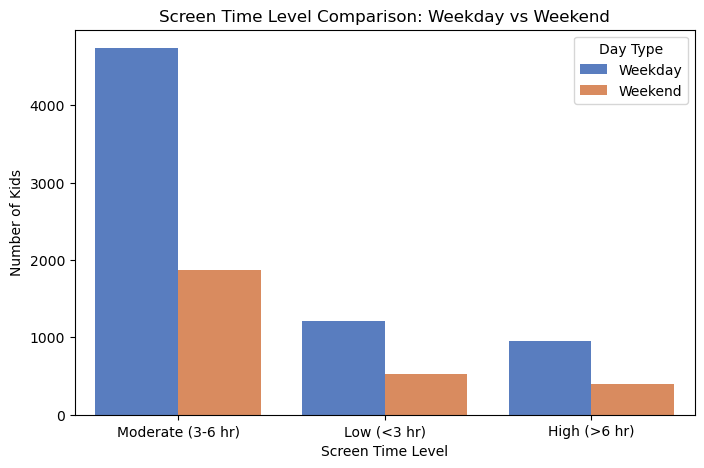

In [16]:
# Screen Time Level Comparison: Weekday vs Weekend

fig = plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ScreenTime_Level', hue='Day_Type', palette='muted')
plt.title("Screen Time Level Comparison: Weekday vs Weekend")
plt.xlabel("Screen Time Level")
plt.ylabel("Number of Kids")
plt.legend(title="Day Type")

C:\Users\geeky\AppData\Local\Temp\ipykernel_12076\1021121485.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Day_Type', y='Health_Impact_Count', palette='coolwarm')


Text(0, 0.5, 'Health Impact Count')

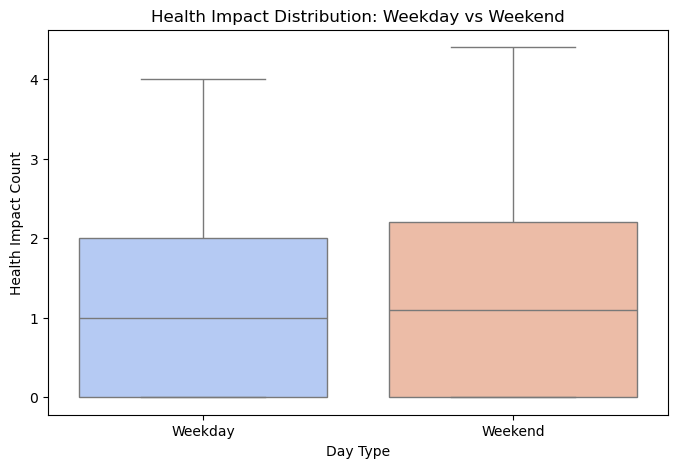

In [17]:
# Health Impact Count: Weekday vs Weekend

fig = plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Day_Type', y='Health_Impact_Count', palette='coolwarm')
plt.title("Health Impact Distribution: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Health Impact Count")